In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/zhaos/Downloads/Electric_Vehicle_Population_Data.csv")

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,5YJ3E1EB1J,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,475911439,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
2,WP0AD2A73G,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,0.0,1.0,101971278,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EB5J,Kitsap,Bremerton,WA,98310.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,474363746,POINT (-122.6231895 47.5930874),PUGET SOUND ENERGY INC,5.303508e+10
4,1N4AZ1CP3K,King,Redmond,WA,98052.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,0.0,45.0,476346482,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [4]:
df_cleaned = df.dropna()

In [5]:
print(df_cleaned.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

from shapely import wkt
from shapely.wkt import loads
from shapely.geometry import Point, Polygon

C:\Users\zhaos\AppData\Local\Temp\ipykernel_36116\2377086015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['geometry'] = df_cleaned['Vehicle Location'].apply(wkt.loads)
C:\Users\zhaos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

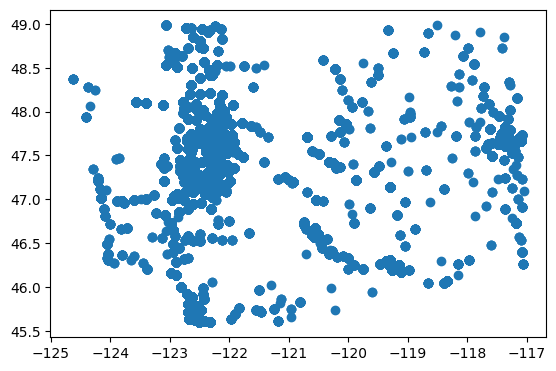

In [ ]:
df_cleaned['geometry'] = df_cleaned['Vehicle Location'].apply(wkt.loads)

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(df_cleaned, geometry='geometry')

# Set CRS
gdf.crs = {'init':'epsg:4326'}

# Plot
gdf.plot()
plt.show()

C:\Users\zhaos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


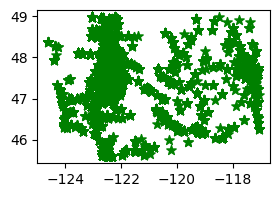

In [21]:
# Create GeoDataFrame using points_from_xy with df_cleaned
gdf = gpd.GeoDataFrame(
    df_cleaned, 
    geometry=gpd.points_from_xy(
        df_cleaned['Vehicle Location'].apply(lambda x: float(wkt.loads(x).x)),
        df_cleaned['Vehicle Location'].apply(lambda x: float(wkt.loads(x).y))
    )
)

# Set CRS
gdf.crs = {'init':'epsg:4326'}

# Create plot with specified styling
gdf.plot(
    marker='*',          # Star-shaped marker
    color='green',       # Green color
    markersize=50,       # Large marker size
    figsize=(3, 3)       # Square figure size
)

plt.show()

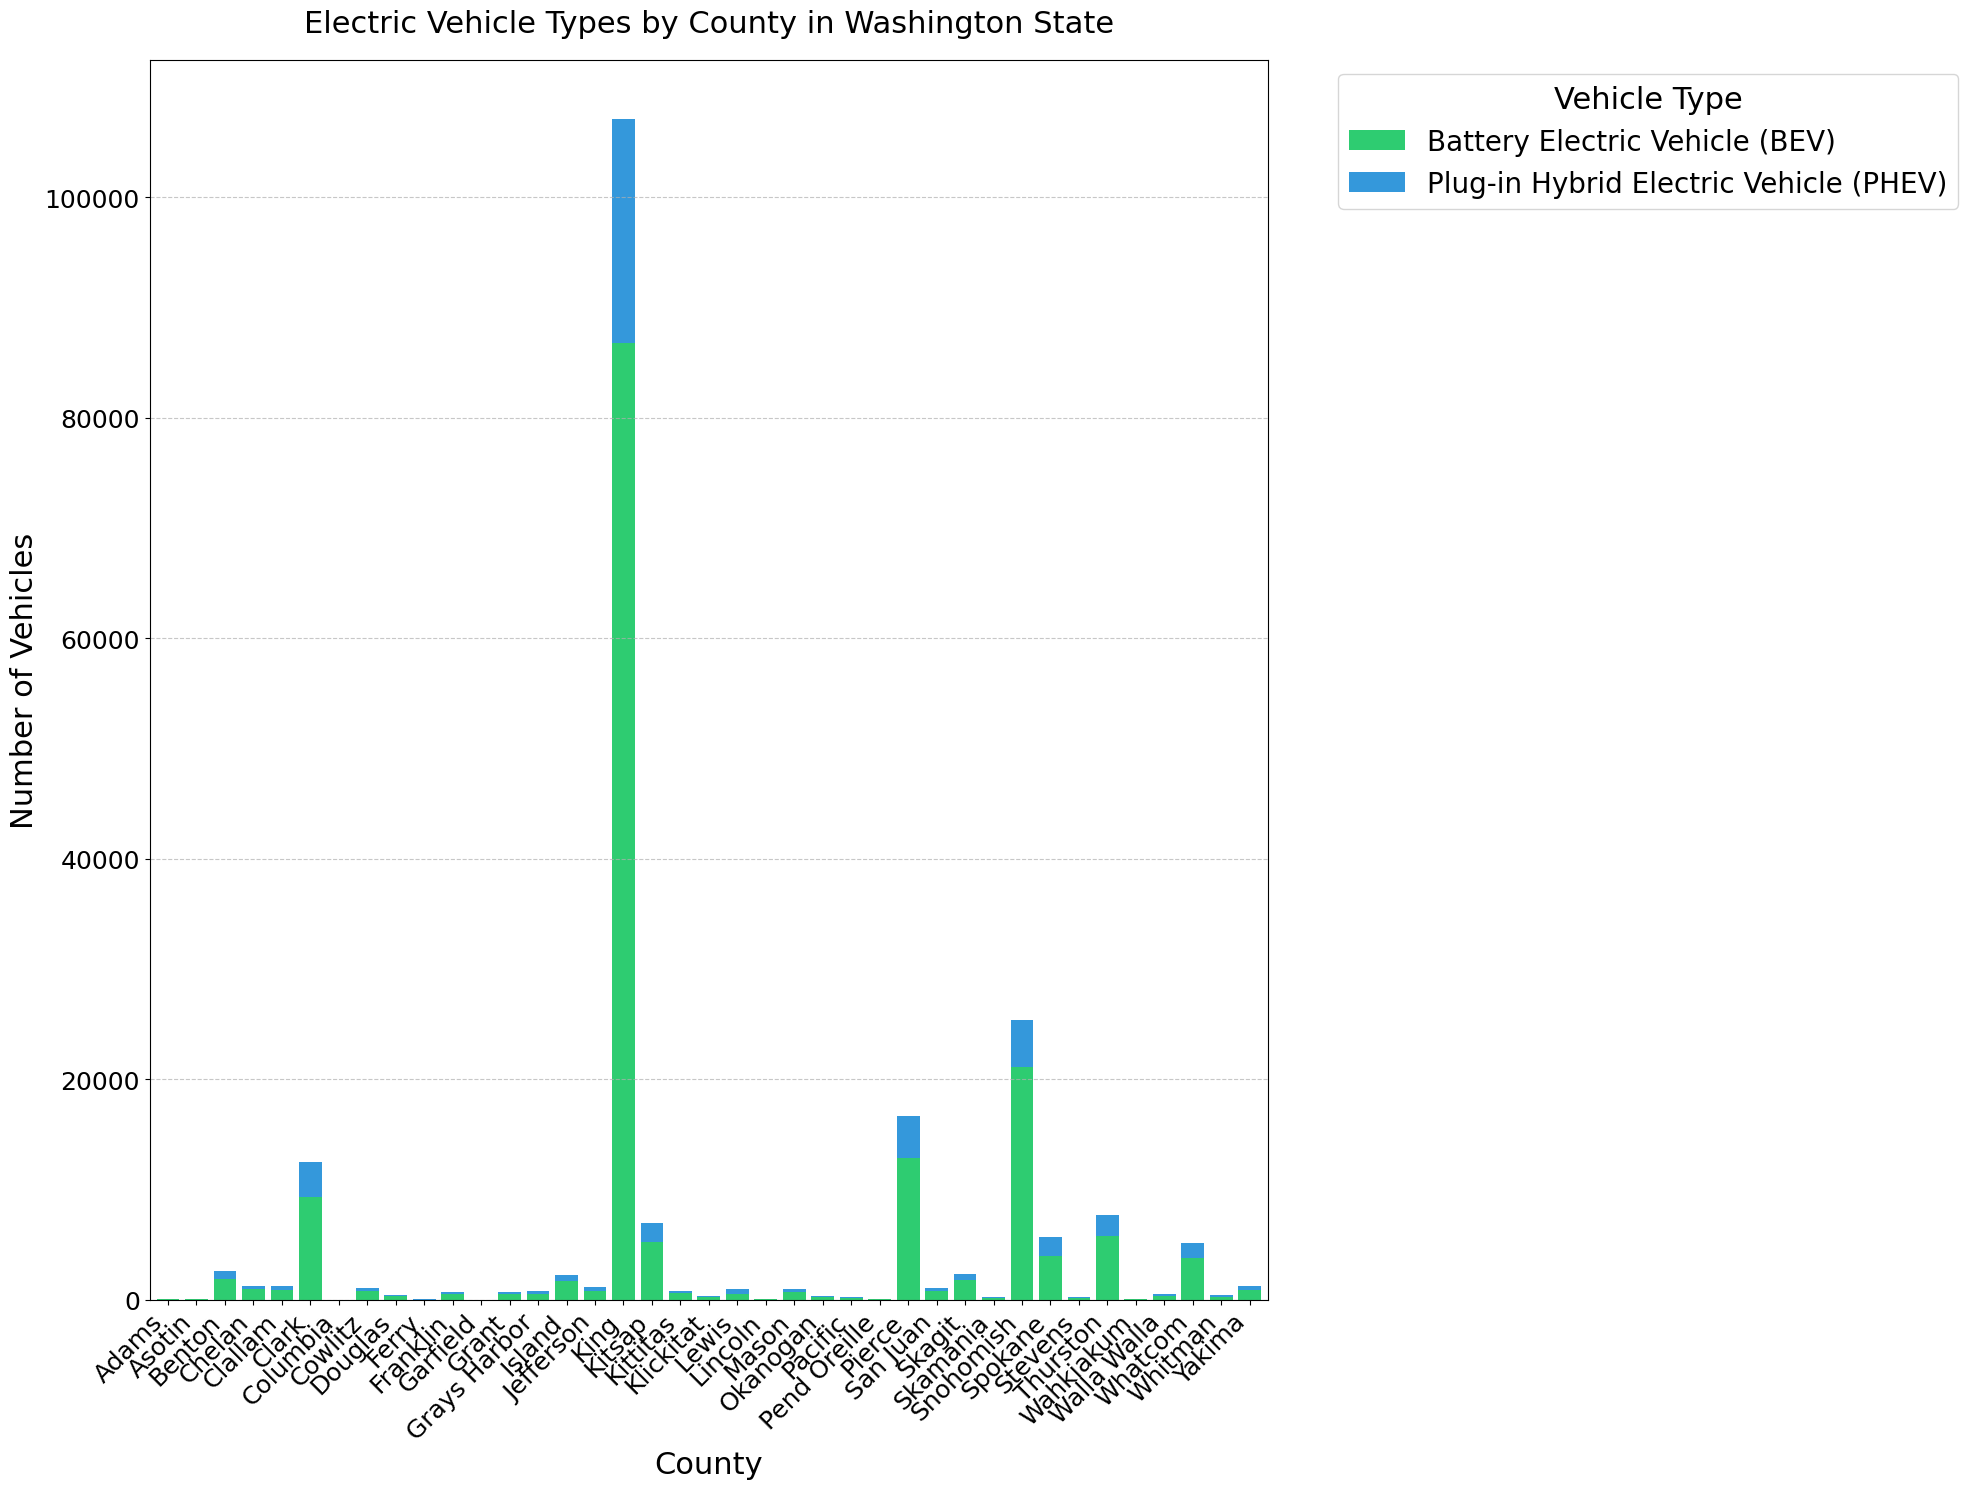

In [38]:
# Group by County and Electric Vehicle Type, count the occurrences
vehicle_counts = df_cleaned.groupby(['County', 'Electric Vehicle Type']).size().unstack(fill_value=0)

# Create figure and axis objects with adjusted size
fig, ax = plt.subplots(figsize=(20, 15))  # Keep the same size

# Create vertical bar plot (switched from 'barh' to 'bar')
vehicle_counts.plot(
    kind='bar',  # Changed from 'barh' to 'bar'
    stacked=True,
    color=['#2ecc71', '#3498db'],
    width=0.8,
    ax=ax
)

# Customize the plot with the same large font sizes
plt.title('Electric Vehicle Types by County in Washington State', fontsize=22, pad=20)
plt.xlabel('County', fontsize=22)  # Switched from ylabel to xlabel
plt.ylabel('Number of Vehicles', fontsize=22)  # Switched from xlabel to ylabel
plt.legend(title='Vehicle Type', title_fontsize=22, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Changed from axis='x' to axis='y'

# Increase tick label sizes
plt.yticks(fontsize=18)  # Switched from xticks to yticks
plt.xticks(fontsize=18, rotation=45, ha='right')  # Added rotation for county names

# Set y-axis limits more precisely (switched from x to y)
max_value = vehicle_counts.sum(axis=1).max()
plt.ylim(0, max_value * 1.05)

# Adjust layout
plt.tight_layout()

plt.show()

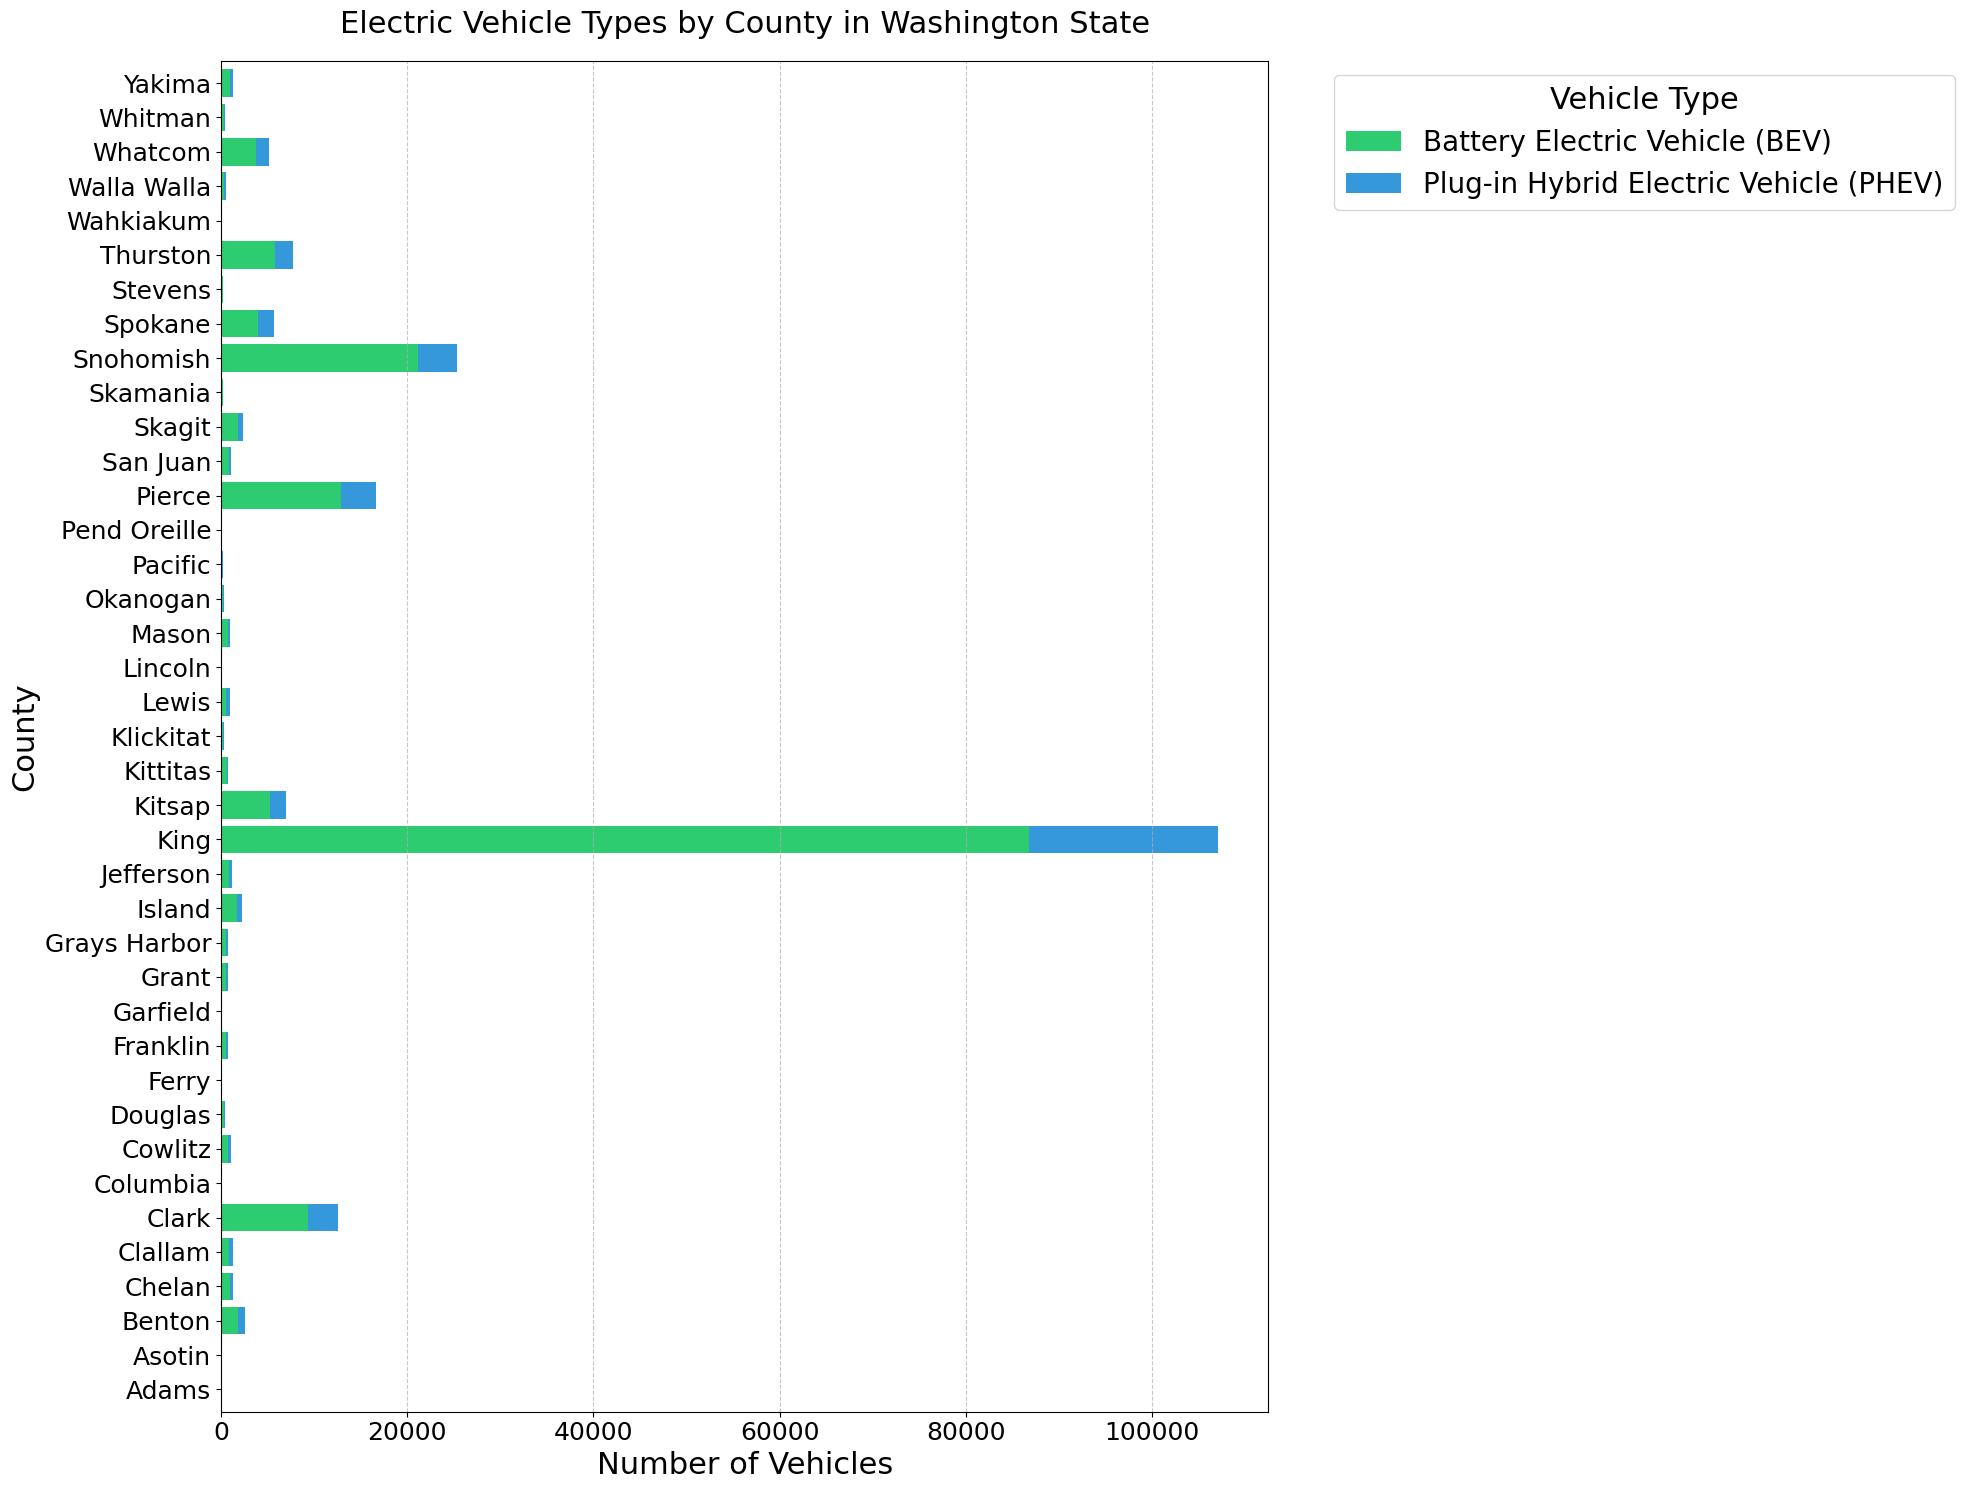

In [37]:
# Group by County and Electric Vehicle Type, count the occurrences
vehicle_counts = df_cleaned.groupby(['County', 'Electric Vehicle Type']).size().unstack(fill_value=0)

# Create figure and axis objects with adjusted size
fig, ax = plt.subplots(figsize=(20, 15))  # Reduced width from 25 to 20

# Create horizontal bar plot
vehicle_counts.plot(
    kind='barh',
    stacked=True,
    color=['#2ecc71', '#3498db'],
    width=0.8,
    ax=ax
)

# Customize the plot with larger font sizes
plt.title('Electric Vehicle Types by County in Washington State', fontsize=22, pad=20)
plt.ylabel('County', fontsize=22)
plt.xlabel('Number of Vehicles', fontsize=22)
plt.legend(title='Vehicle Type', title_fontsize=22, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Increase tick label sizes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18, rotation=0)

# Set x-axis limits more precisely
max_value = vehicle_counts.sum(axis=1).max()
plt.xlim(0, max_value * 1.05)  # Only 10% padding instead of 50%

# Adjust layout
plt.tight_layout()

plt.show()

In [51]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the local GeoJSON file
wa_counties = gpd.read_file(r"C:\Users\zhaos\Downloads\WA_County_Boundaries.geojson")

# Print sample of JURISDICT_NM to confirm it contains county names
print("Sample county names from GeoJSON:")
print(wa_counties['JURISDICT_NM'].head())

print("\nCounty names from your data:")
print(df_cleaned['County'].unique())

Sample county names from GeoJSON:
0          Grant County
1       Garfield County
2         Island County
3       Kittitas County
4    Walla Walla County
Name: JURISDICT_NM, dtype: object

County names from your data:
['Kitsap' 'Snohomish' 'King' 'Thurston' 'Yakima' 'Skagit' 'Chelan'
 'Stevens' 'Kittitas' 'Walla Walla' 'Island' 'Whitman' 'Spokane' 'Grant'
 'Clark' 'Cowlitz' 'Jefferson' 'Clallam' 'Klickitat' 'Pierce' 'Whatcom'
 'Grays Harbor' 'Lewis' 'Okanogan' 'Pacific' 'Franklin' 'Skamania'
 'Pend Oreille' 'Mason' 'Benton' 'San Juan' 'Adams' 'Douglas' 'Lincoln'
 'Asotin' 'Wahkiakum' 'Columbia' 'Ferry' 'Garfield']


GeoJSON Info:
   OBJECTID  JURISDICT_SYST_ID  JURISDICT_TYPE_CD JURISDICT_LABEL_NM  \
0    507246                 25                  4              Grant   
1    511402                 33                  4           Garfield   
2    511764                  8                  4             Island   
3    512388            4699350                  4           Kittitas   
4    512431                 35                  4        Walla Walla   

         JURISDICT_NM  JURISDICT_DESG_CD  JURISDICT_FIPS_DESG_CD  \
0        Grant County                 13                   53025   
1     Garfield County                 12                   53023   
2       Island County                 15                   53029   
3     Kittitas County                 19                   53037   
4  Walla Walla County                 36                   53071   

  JURISDICT_VACATED_FLG                 EDIT_DATE  EDIT_STATUS EDIT_WHO  \
0                  None 2018-03-15 00:26:49+00:00            1  TSTE4

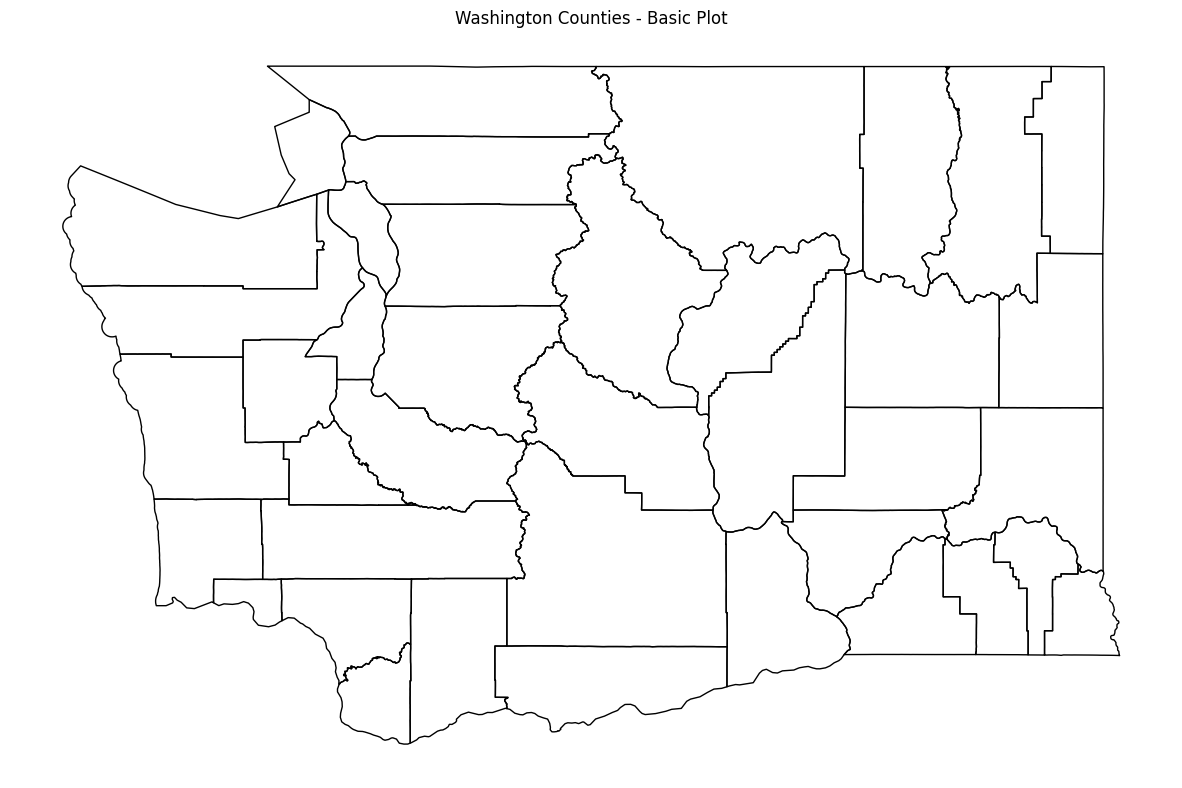


EV Statistics:
Electric Vehicle Type  Battery Electric Vehicle (BEV)  \
County                                                  
Adams                                              45   
Asotin                                             61   
Benton                                           1860   
Chelan                                           1012   
Clallam                                           875   

Electric Vehicle Type  Plug-in Hybrid Electric Vehicle (PHEV)  
County                                                         
Adams                                                      21  
Asotin                                                     26  
Benton                                                    764  
Chelan                                                    267  
Clallam                                                   378  

Merged Data Info:
Empty GeoDataFrame
Columns: [OBJECTID, JURISDICT_SYST_ID, JURISDICT_TYPE_CD, JURISDICT_LABEL_NM, JURISDICT_NM, JURISD

In [54]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the local GeoJSON file
wa_counties = gpd.read_file(r"C:\Users\zhaos\Downloads\WA_County_Boundaries.geojson")

# Print basic information about our datasets
print("GeoJSON Info:")
print(wa_counties.head())
print("\nColumns in wa_counties:", wa_counties.columns)

print("\nGeometry type:", wa_counties.geometry.iloc[0].geom_type)
print("\nCRS:", wa_counties.crs)

# Try a simple plot first
fig, ax = plt.subplots(figsize=(15, 10))

# Just plot the county boundaries first
wa_counties.plot(ax=ax, edgecolor='black', facecolor='none')
plt.title('Washington Counties - Basic Plot')
plt.axis('off')
plt.show()

# If the above works, let's check our merged data
county_stats = df_cleaned.groupby(['County', 'Electric Vehicle Type']).size().unstack(fill_value=0)
print("\nEV Statistics:")
print(county_stats.head())

# Check if merge worked
merged = wa_counties.merge(county_stats, left_on='JURISDICT_NM', right_index=True)
print("\nMerged Data Info:")
print(merged.head())

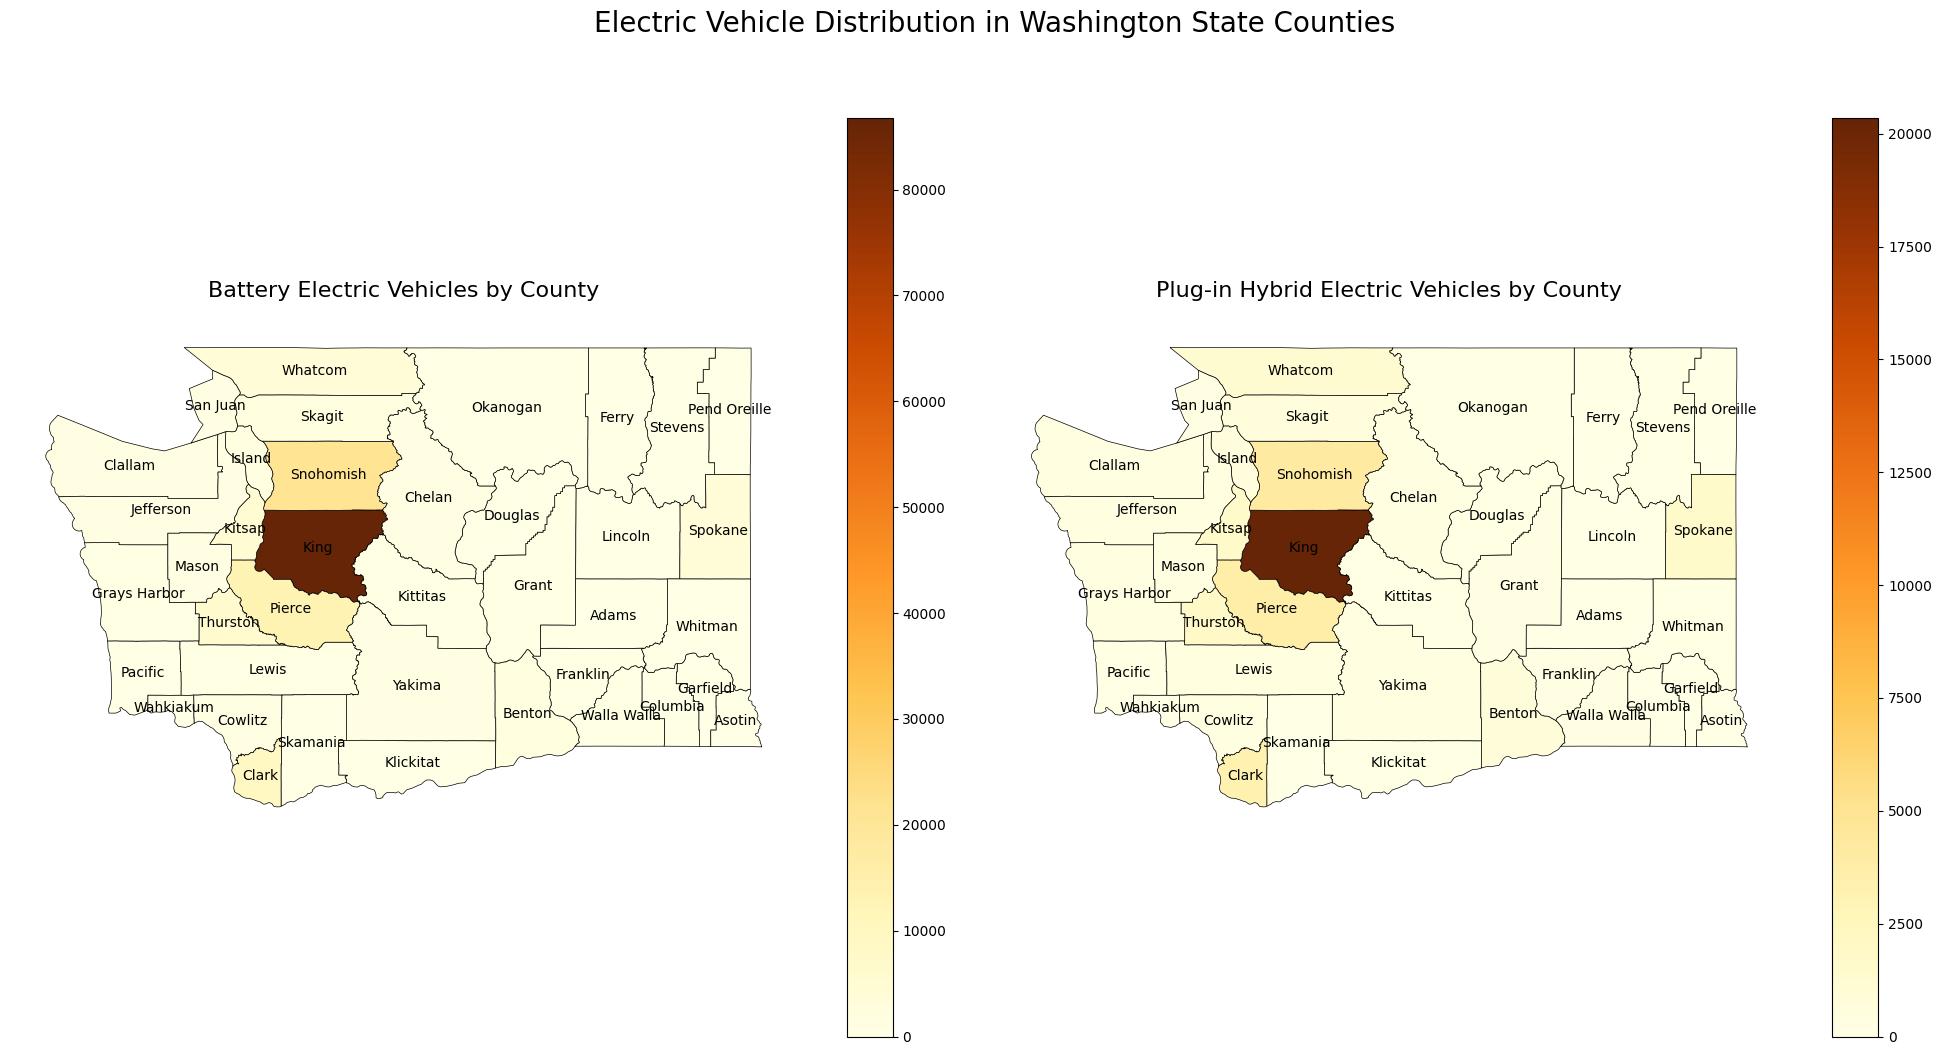

In [56]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the local GeoJSON file
wa_counties = gpd.read_file(r"C:\Users\zhaos\Downloads\WA_County_Boundaries.geojson")

# Group your data by county and vehicle type
# First, make sure county names match by adding "County" if needed
if not df_cleaned['County'].str.contains('County').all():
    df_cleaned['County'] = df_cleaned['County'] + ' County'

county_stats = df_cleaned.groupby(['County', 'Electric Vehicle Type']).size().unstack(fill_value=0)

# Merge with geographic data
wa_counties = wa_counties.merge(county_stats, left_on='JURISDICT_NM', right_index=True)

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot BEVs
wa_counties.plot(
    column='Battery Electric Vehicle (BEV)',
    ax=ax1,
    legend=True,
    cmap='YlOrBr',
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={'color': 'lightgrey'}
)
ax1.set_title('Battery Electric Vehicles by County', fontsize=16, pad=20)
ax1.axis('off')

# Customize first legend
if ax1.get_legend():
    ax1.get_legend().set_label('Number of BEVs')
    ax1.get_legend().set_font_properties({'size': 14})

# Add county labels to first map
for idx, row in wa_counties.iterrows():
    centroid = row.geometry.centroid
    ax1.annotate(row['JURISDICT_NM'].replace(' County', ''), 
                xy=(centroid.x, centroid.y),
                fontsize=10, 
                ha='center', 
                va='center')

# Plot PHEVs
wa_counties.plot(
    column='Plug-in Hybrid Electric Vehicle (PHEV)',
    ax=ax2,
    legend=True,
    cmap='YlOrBr',
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={'color': 'lightgrey'}
)
ax2.set_title('Plug-in Hybrid Electric Vehicles by County', fontsize=16, pad=20)
ax2.axis('off')

# Customize second legend
if ax2.get_legend():
    ax2.get_legend().set_label('Number of PHEVs')
    ax2.get_legend().set_font_properties({'size': 14})

# Add county labels to second map
for idx, row in wa_counties.iterrows():
    centroid = row.geometry.centroid
    ax2.annotate(row['JURISDICT_NM'].replace(' County', ''), 
                xy=(centroid.x, centroid.y),
                fontsize=10, 
                ha='center', 
                va='center')

plt.suptitle('Electric Vehicle Distribution in Washington State Counties', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

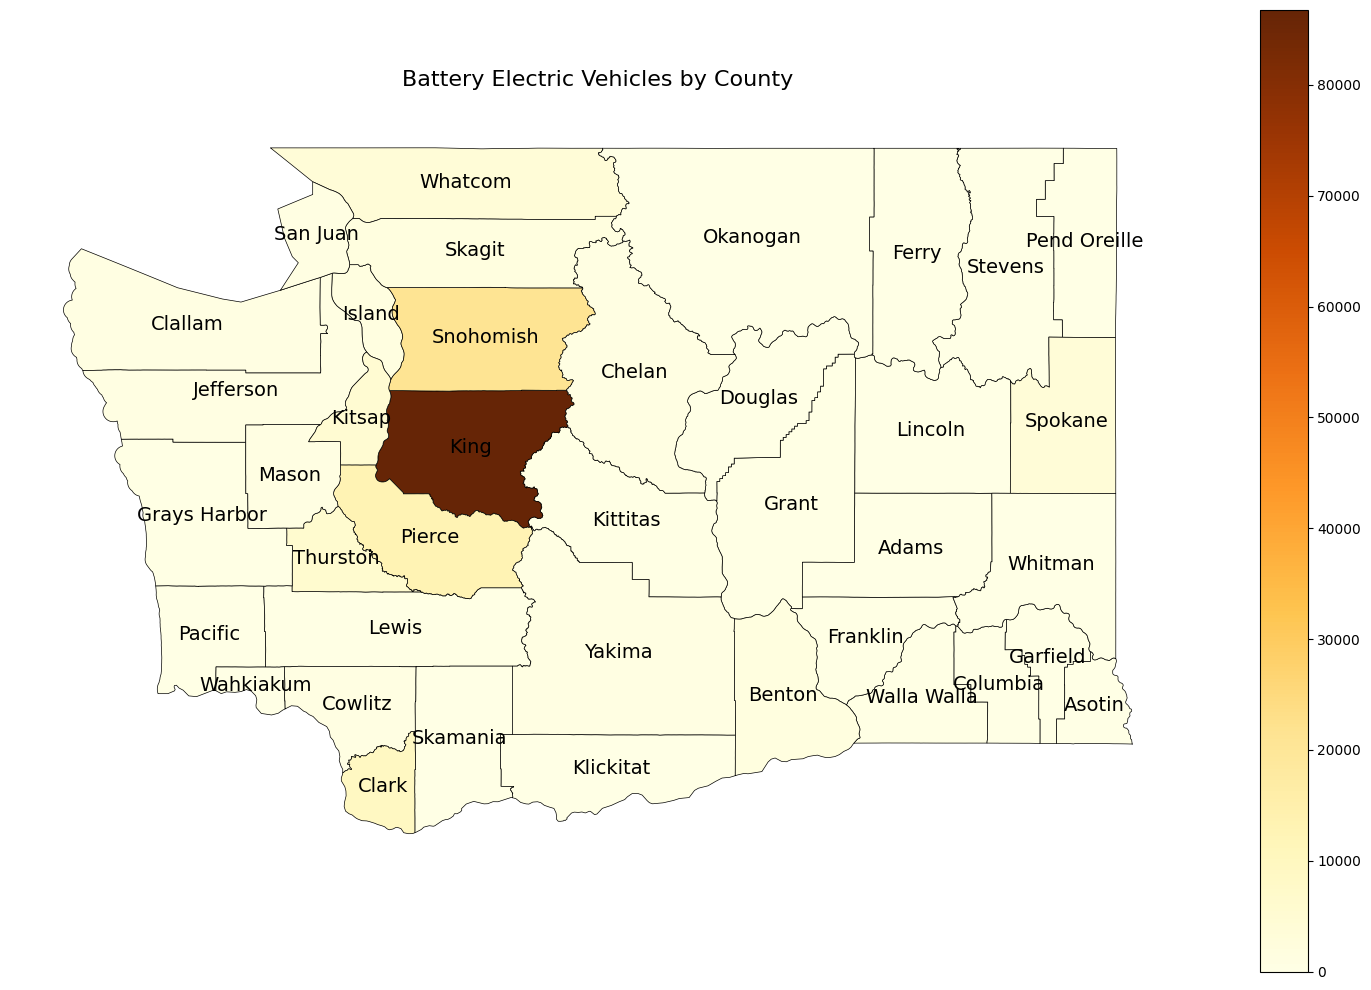

In [ ]:
# Read the local GeoJSON file
wa_counties = gpd.read_file(r"C:\Users\zhaos\Downloads\WA_County_Boundaries.geojson")

# Group your data by county and vehicle type
if not df_cleaned['County'].str.contains('County').all():
    df_cleaned['County'] = df_cleaned['County'] + ' County'

county_stats = df_cleaned.groupby(['County', 'Electric Vehicle Type']).size().unstack(fill_value=0)

# Merge with geographic data
wa_counties = wa_counties.merge(county_stats, left_on='JURISDICT_NM', right_index=True)

# Create figure for BEVs
fig, ax = plt.subplots(figsize=(15, 10))

# Plot BEVs
wa_counties.plot(
    column='Battery Electric Vehicle (BEV)',
    ax=ax,
    legend=True,
    cmap='YlOrBr',
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={'color': 'lightgrey'}
)
ax.set_title('Battery Electric Vehicles by County', fontsize=16, pad=20)
ax.axis('off')

# Customize legend
if ax.get_legend():
    ax.get_legend().set_label('Number of BEVs')
    ax.get_legend().set_font_properties({'size': 14})

# Add county labels
for idx, row in wa_counties.iterrows():
    centroid = row.geometry.centroid
    ax.annotate(row['JURISDICT_NM'].replace(' County', ''), 
                xy=(centroid.x, centroid.y),
                fontsize=14, 
                ha='center', 
                va='center')

plt.tight_layout()
plt.show()

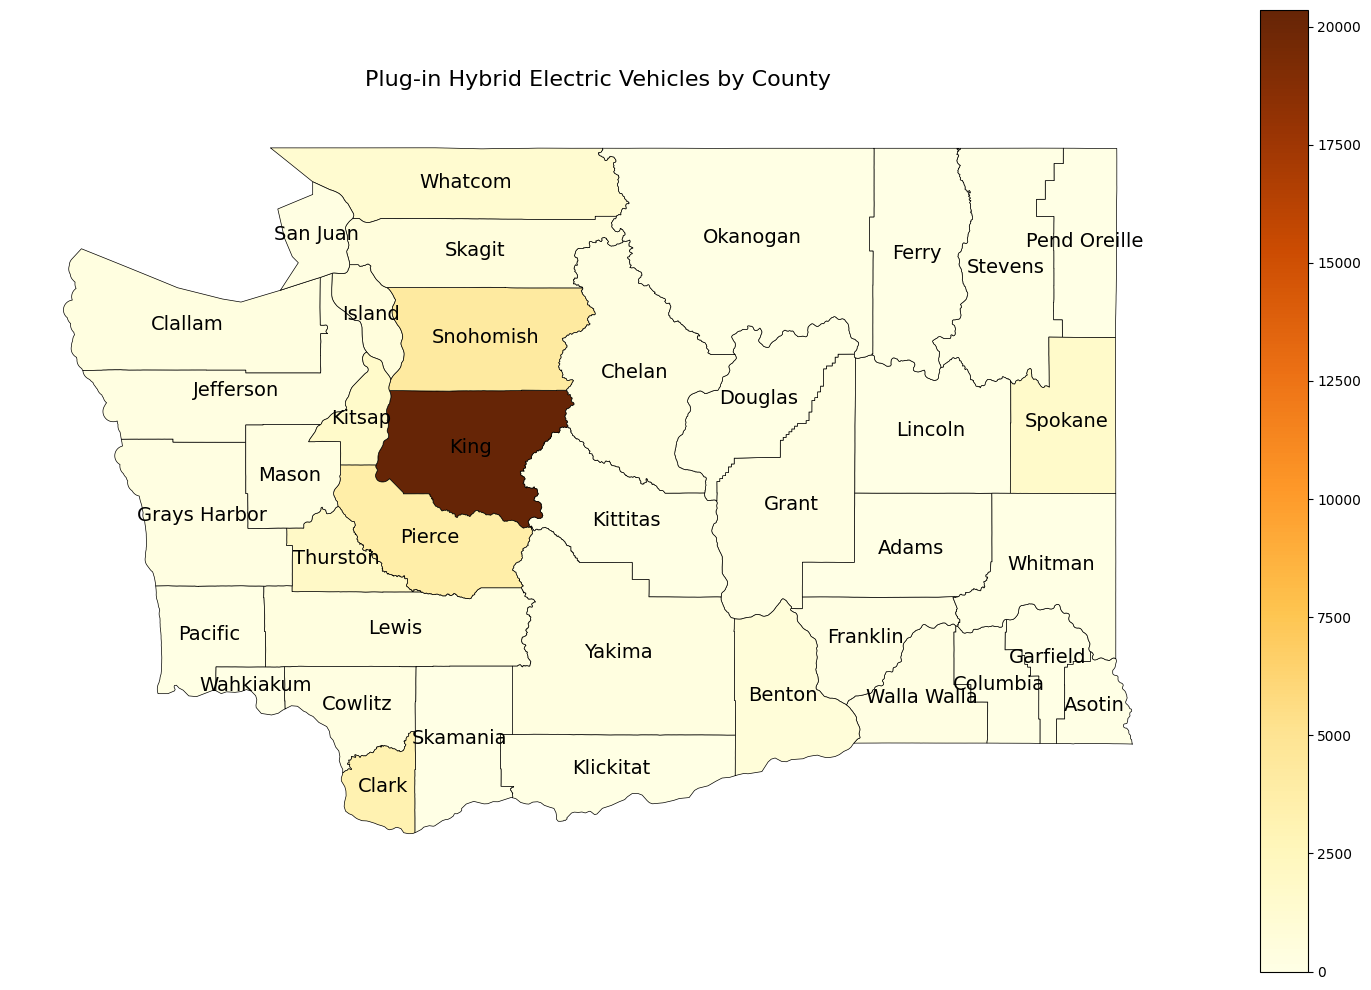

In [ ]:
# Group your data by county and vehicle type
if not df_cleaned['County'].str.contains('County').all():
    df_cleaned['County'] = df_cleaned['County'] + ' County'

county_stats = df_cleaned.groupby(['County', 'Electric Vehicle Type']).size().unstack(fill_value=0)

# Merge with geographic data
wa_counties = wa_counties.merge(county_stats, left_on='JURISDICT_NM', right_index=True)

# Create figure for PHEVs
fig, ax = plt.subplots(figsize=(15, 10))

# Plot PHEVs
wa_counties.plot(
    column='Plug-in Hybrid Electric Vehicle (PHEV)',
    ax=ax,
    legend=True,
    cmap='YlOrBr',
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={'color': 'lightgrey'}
)
ax.set_title('Plug-in Hybrid Electric Vehicles by County', fontsize=16, pad=20)
ax.axis('off')

# Customize legend
if ax.get_legend():
    ax.get_legend().set_label('Number of PHEVs')
    ax.get_legend().set_font_properties({'size': 14})

# Add county labels
for idx, row in wa_counties.iterrows():
    centroid = row.geometry.centroid
    ax.annotate(row['JURISDICT_NM'].replace(' County', ''), 
                xy=(centroid.x, centroid.y),
                fontsize=14, 
                ha='center', 
                va='center')

plt.tight_layout()
plt.show()